<a href="https://colab.research.google.com/github/ab0473a/Machine-Learning-/blob/main/AutoGluon_EVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autogluon

In [1]:
%matplotlib inline
import autogluon.core as ag
from autogluon.vision import ImageDataset, ImagePredictor
import pandas as pd

In [2]:

root = '/content/drive/MyDrive/Colab Notebooks/Emergency_Vehicle_Images'
evi_data = ImageDataset.from_folder(root)
evi_data.head(300)

,image,label
0,/content/drive/MyDrive/Colab Notebooks/Emergen...,0
1,/content/drive/MyDrive/Colab Notebooks/Emergen...,0
2,/content/drive/MyDrive/Colab Notebooks/Emergen...,0
3,/content/drive/MyDrive/Colab Notebooks/Emergen...,0
4,/content/drive/MyDrive/Colab Notebooks/Emergen...,0
...,...,...
282,/content/drive/MyDrive/Colab Notebooks/Emergen...,2
283,/content/drive/MyDrive/Colab Notebooks/Emergen...,2
284,/content/drive/MyDrive/Colab Notebooks/Emergen...,2
285,/content/drive/MyDrive/Colab Notebooks/Emergen...,2


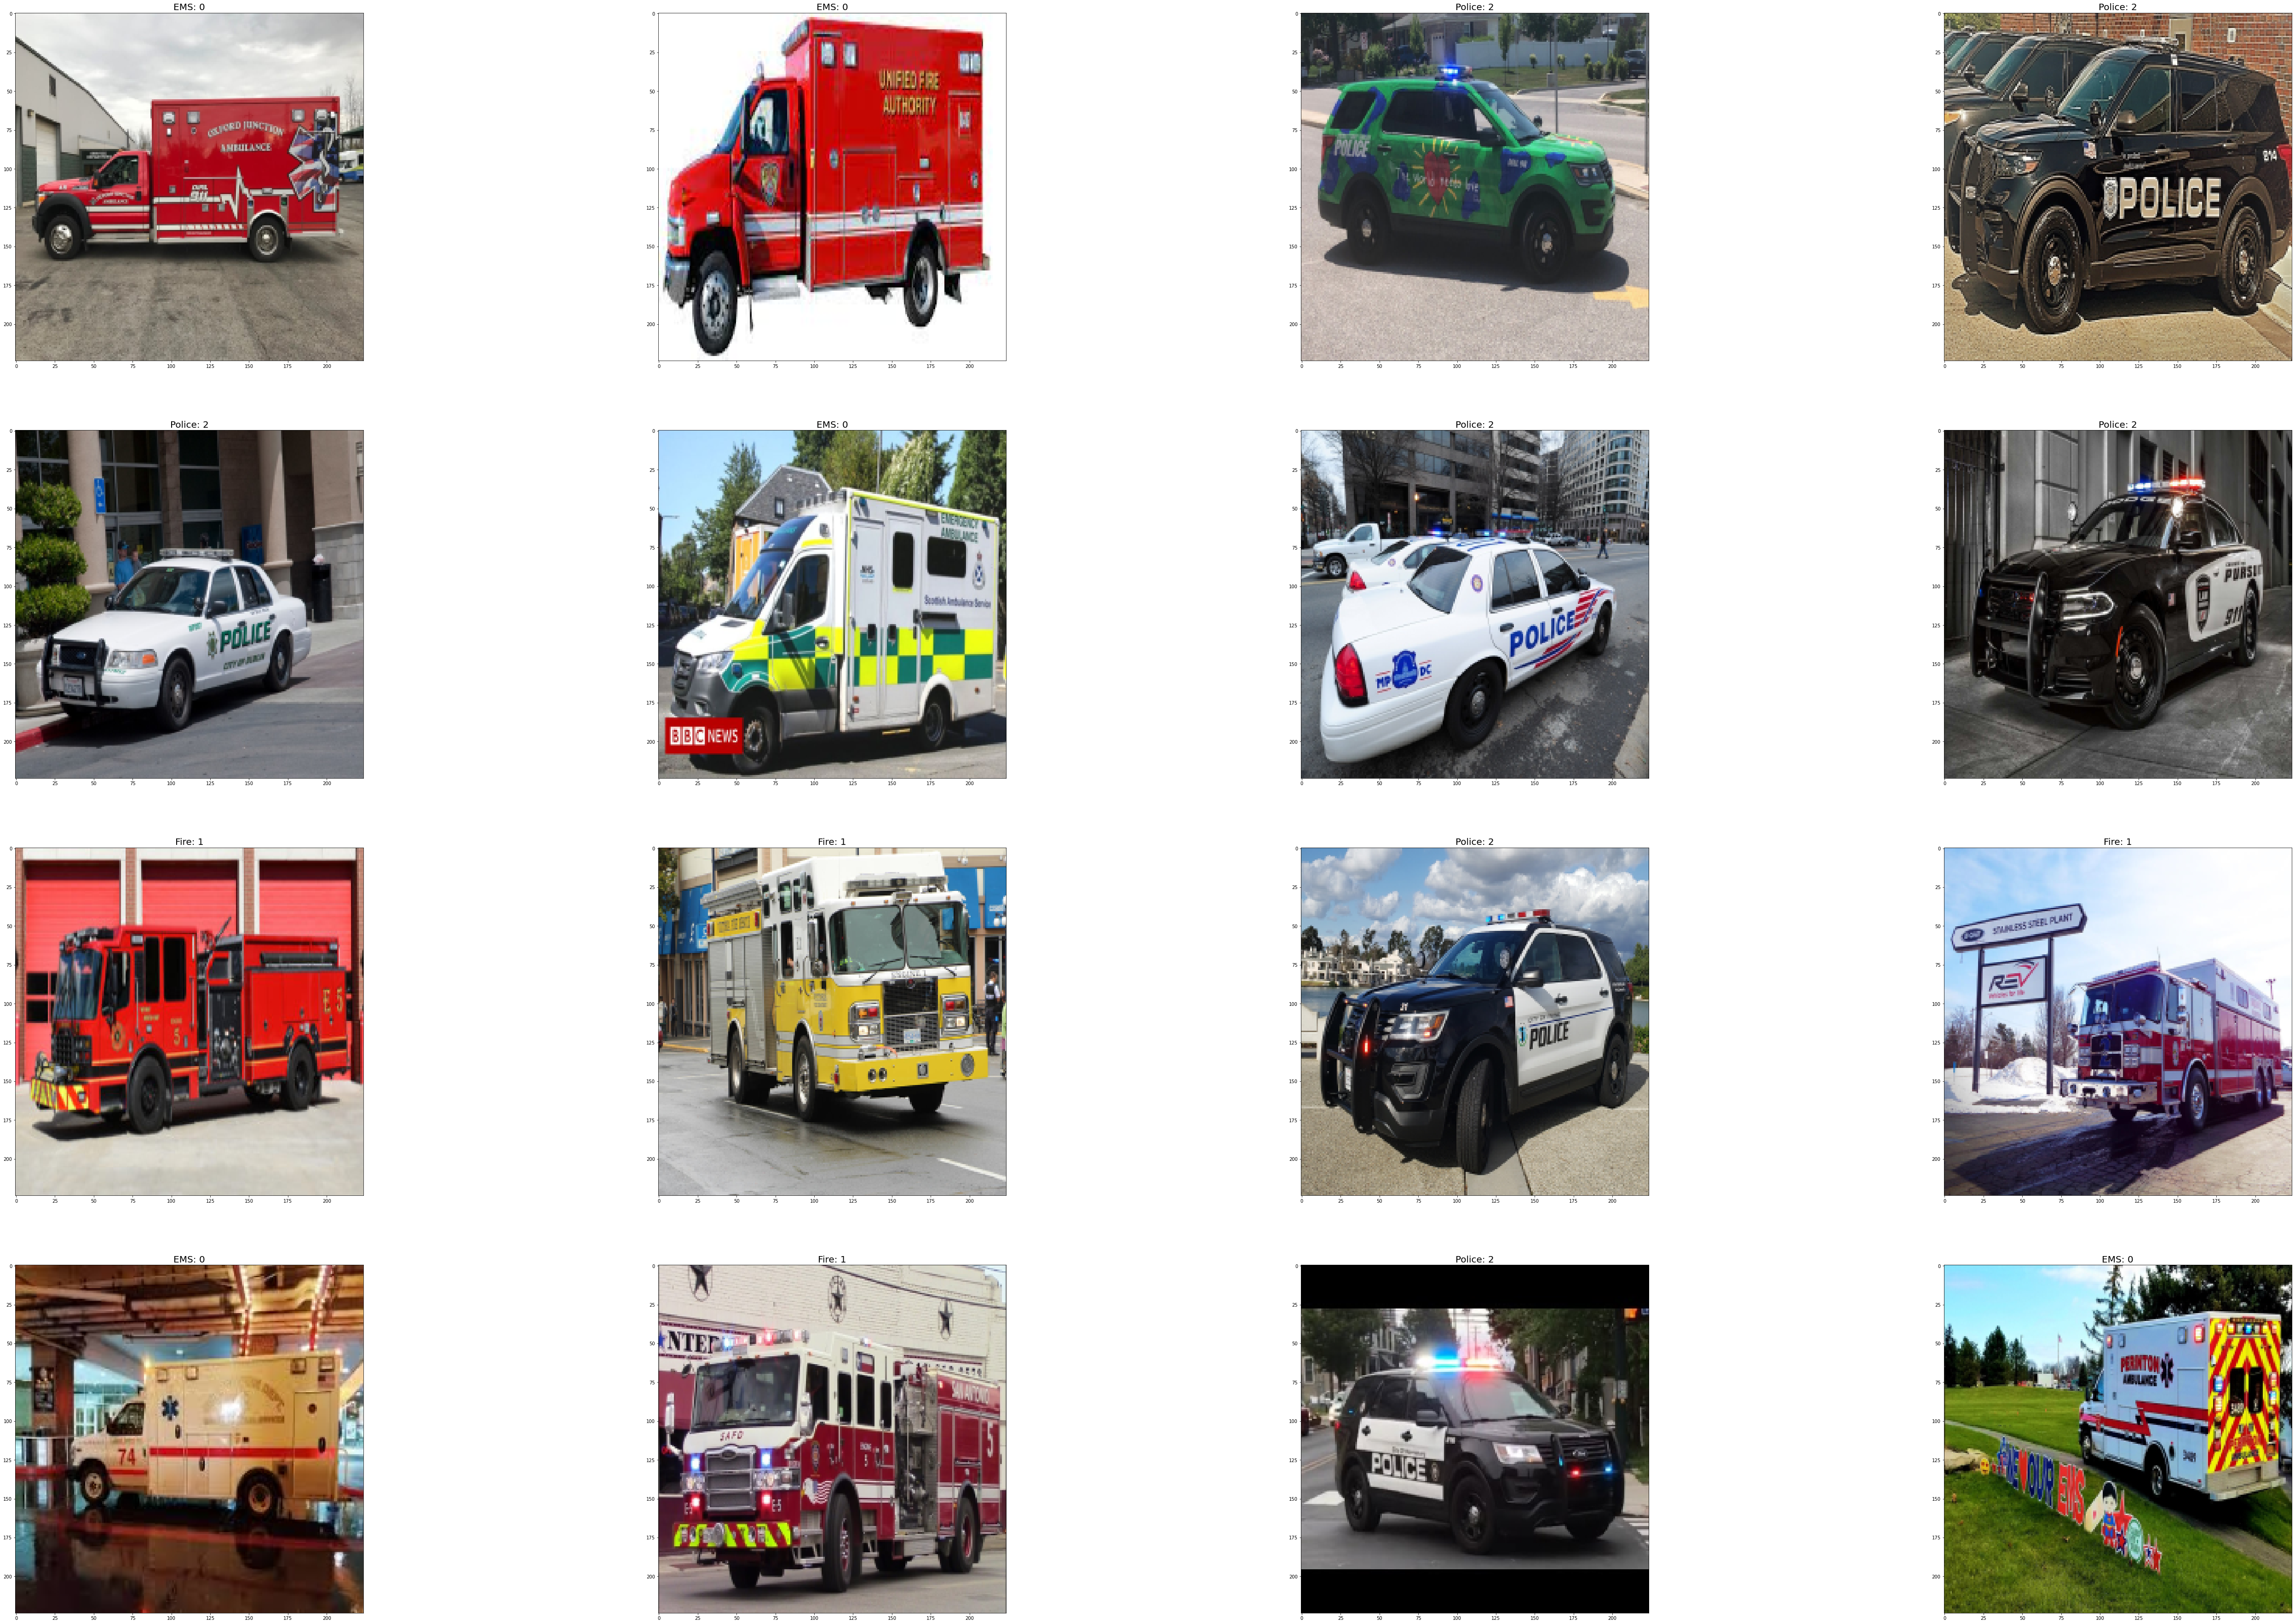

In [3]:
evi_data.show_images()

In [4]:
# you can manually split the dataset or use `random_split`
train, val, test = evi_data.random_split(val_size=0.1, test_size=0.1)
print('train #:', len(train), 'test #:', len(test))

train #: 232 test #: 24


In [5]:
predictor = ImagePredictor()
# since the original dataset does not provide validation split, the `fit` function splits it randomly with 90/10 ratio
predictor.fit(evi_data, hyperparameters={'epochs': 25})  

`time_limit=auto` set to `time_limit=7200`.
Reset labels to [0, 1, 2]
Randomly split train_data into train[258]/validation[29] splits.
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.misc.num_workers 4 != 2
root.misc.seed       42 != 699
root.train.epochs    200 != 25
root.train.early_stop_patience -1 != 10
root.train.batch_size 32 != 16
root.train.early_stop_max_value 1.0 != inf
root.train.early_stop_baseline 0.0 != -inf
root.img_cls.model   resnet101 != resnet50
}
Saved config to /content/e1bd33e0/.trial_0/config.yaml
Model resnet50 created, param count:                                         23514179
AMP not enabled. Training in float32.
Disable EMA as it is not supported for now.
Start training from [Epoch 0]
[Epoch 0] training: accuracy=0.324219
[Epoch 0] speed: 6 samples/sec	time cost: 35.476723
[Epoch 0] validation: top1=0.344828 top5=1.000000
[Epoch 0] Current bes

In [6]:
fit_result = predictor.fit_summary()
print('Top-1 train acc: %.3f, val acc: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))

Top-1 train acc: 0.883, val acc: 0.966


In [7]:
fire_path = '/content/drive/MyDrive/Colab Notebooks/EVI test images/Ferrara-fire-ladder-HD-57.jpeg'
result = predictor.predict(fire_path)
print(result)

0    1
Name: label, dtype: int64


In [8]:
amb_path = '/content/drive/MyDrive/Colab Notebooks/EVI test images/falck amb.jpeg'
result = predictor.predict(amb_path)
print(result)

0    0
Name: label, dtype: int64


In [9]:
pd_path = '/content/drive/MyDrive/Colab Notebooks/EVI test images/crown vic old .jpeg'
result = predictor.predict(pd_path)
print(result)

0    2
Name: label, dtype: int64


In [10]:
proba = predictor.predict_proba(fire_path)
print(proba)

          0         1         2
0  0.314358  0.671767  0.013876


In [11]:
bulk_result = predictor.predict(test)
print(bulk_result)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:946: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


23     0
27     0
42     0
49     0
54     0
64     0
71     0
75     0
81     0
105    1
107    1
147    1
163    1
202    2
211    2
215    2
235    2
241    2
262    2
267    2
270    2
277    2
278    2
284    2
Name: label, dtype: int64
